## Libraries

In [1215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro  
import plotly.graph_objects as go   
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
import re

## Import csv

In [1216]:
sportsbetting=pd.read_excel("Data\sports.xlsx")                    # .csv upload
sportsbetting.head()

Sport  Wager  Paid  Winnings  Hold  Purchase_Time         Competition  \
0  Baloncesto   1.00   0.0      1.00   1.0      Unchecked  Germany Bundesliga   
1  Baloncesto  42.52   0.0     42.52   1.0      Unchecked  Germany Bundesliga   
2  Baloncesto   7.03   0.0      7.03   1.0      Unchecked  Germany Bundesliga   
3  Baloncesto   4.20   0.0      4.20   1.0        Checked  Germany Bundesliga   
4  Baloncesto   2.50   0.0      2.50   1.0        Checked  Germany Bundesliga   

                                 Event Event_Date      Time  
0           Alba Berlín - BG Gottingen 2024-02-13       NaN  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03       NaN  
2         Alba Berlín - Ratiopharm Ulm 2024-02-04       NaN  
3     Alba Berlin - S. Oliver Wurzburg 2024-01-14       NaN  
4           Baskets Bonn - Alba Berlin 2024-01-21  20:00:00

## DataFrame Shape and Size

In [1217]:
sportsbetting.info()                                        # 4 float columns, 4 object and 1 datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23607 entries, 0 to 23606
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sport           23607 non-null  object        
 1   Wager           23607 non-null  float64       
 2   Paid            23607 non-null  float64       
 3   Winnings        23607 non-null  float64       
 4   Hold            23607 non-null  float64       
 5    Purchase_Time  23607 non-null  object        
 6   Competition     23607 non-null  object        
 7    Event          23607 non-null  object        
 8   Event_Date      23607 non-null  datetime64[ns]
 9   Time            22297 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 1.8+ MB


In [1218]:
sportsbetting.drop_duplicates()                           # Clean duplicates, in this cases there was no duplicates on de DataFrame

Sport  Wager  Paid  Winnings  Hold  Purchase_Time  \
0      Baloncesto   1.00   0.0      1.00   1.0      Unchecked   
1      Baloncesto  42.52   0.0     42.52   1.0      Unchecked   
2      Baloncesto   7.03   0.0      7.03   1.0      Unchecked   
3      Baloncesto   4.20   0.0      4.20   1.0        Checked   
4      Baloncesto   2.50   0.0      2.50   1.0        Checked   
...           ...    ...   ...       ...   ...            ...   
23602   Waterpolo   0.26   0.0      0.26   1.0      Unchecked   
23603   Waterpolo   0.16   0.0      0.16   1.0      Unchecked   
23604   Waterpolo   0.30   0.0      0.30   1.0        Checked   
23605   Waterpolo   0.16   0.0      0.16   1.0      Unchecked   
23606   Waterpolo   0.26   0.0      0.26   1.0      Unchecked   

                          Competition                                Event  \
0                  Germany Bundesliga           Alba Berlín - BG Gottingen   
1                  Germany Bundesliga  Alba Berlín - EWE Baskets Oldenburg   
2                  Germany Bundesliga         Alba Berlín - Ratiopharm Ulm   
3                  Germany Bundesliga     Alba Berlin - S. Oliver Wurzburg   
4                  Germany Bundesliga           Baskets Bonn - Alba Berlin   
...                               ...                                  ...   
23602   Campeonato del Mundo Femenino                China - Nueva Zelanda   
23603   Campeonato del Mundo Femenino             Reino Unido - Kazajistán   
23604  Campeonato del Mundo Masculino                      Grecia - Italia   
23605  Campeonato del Mundo Masculino                    Hungría - Francia   
23606  Campeonato del Mundo Masculino                     Serbia - Croacia   

      Event_Date      Time  
0     2024-02-13       NaN  
1     2024-03-03       NaN  
2     2024-02-04       NaN  
3     2024-01-14       NaN  
4     2024-01-21  20:00:00  
...          ...       ...  
23602 2024-02-14       NaN  
23603 2024-02-14  10:00:00  
23604 2024-02-13  18:00:00  
23605 2024-02-13  18:05:00  
23606 2024-02-13  11:00:00  

[23607 rows x 10 columns]

## Columns query & Blank spaces cleaning

In [1219]:
sportsbetting.columns                                                  # Columns "Purchase Time" and "Event" contain blanks before letters

Index(['Sport', 'Wager', 'Paid', 'Winnings', 'Hold', ' Purchase_Time',
       'Competition', ' Event', 'Event_Date', 'Time'],
      dtype='object')

In [1220]:
sportsbetting.columns=sportsbetting.columns.str.strip()               # strip() removes leading and trailing blanks from each string in the column names 

In [1221]:
sportsbetting.columns                                                 # Fixed column names

Index(['Sport', 'Wager', 'Paid', 'Winnings', 'Hold', 'Purchase_Time',
       'Competition', 'Event', 'Event_Date', 'Time'],
      dtype='object')

## Statistics

In [1222]:
sportsbetting.describe().round(2)                                   

Wager      Paid  Winnings      Hold
count  23607.00  23607.00  23607.00  23607.00
mean      42.83     36.02      6.81      0.26
std      191.47    277.85    237.10      8.69
min        0.01      0.00 -17459.25   -785.10
25%        0.60      0.00      0.07      0.69
50%        2.85      0.00      1.10      1.00
75%       18.74      0.85      8.33      1.00
max     7068.37  20916.00   7045.65      1.00

In [1223]:
sportsbetting.describe().round(2).T                             # The standard deviation of Wager, Paid and Winnings is high. There is a wide range of amounts wagered, paid and won.
                                                                # Wager and Paid averages are affected by the large variety of values in each column and by the maxima. 
                                                                # The mean of these columns is well above 75% of the column values.

count   mean     std       min   25%   50%    75%       max
Wager     23607.0  42.83  191.47      0.01  0.60  2.85  18.74   7068.37
Paid      23607.0  36.02  277.85      0.00  0.00  0.00   0.85  20916.00
Winnings  23607.0   6.81  237.10 -17459.25  0.07  1.10   8.33   7045.65
Hold      23607.0   0.26    8.69   -785.10  0.69  1.00   1.00      1.00

In [1224]:
wager_median=sportsbetting["Wager"].median()                     # Querying the median of numeric columns
paid_median=sportsbetting["Paid"].median()
winnings_median=sportsbetting["Winnings"].median()
hold_median=sportsbetting["Hold"].median()

print(wager_median)
print(paid_median)
print(winnings_median)
print(hold_median)

2.85
0.0
1.1
1.0


In [1225]:
mean = np.mean(sportsbetting)                                 #Querying the variance of the numeric columns
variance= np.var(sportsbetting,ddof=1)
variance

c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-pack

Wager       36660.837573
Paid        77200.924874
Winnings    56217.033251
Hold           75.586061
dtype: float64

Notes:

- The values in the numerical columns are highly dispersed around the mean. 
- The "Hold" column shows the least dispersion.

## Study of variables

### Numeric variables: Graphs

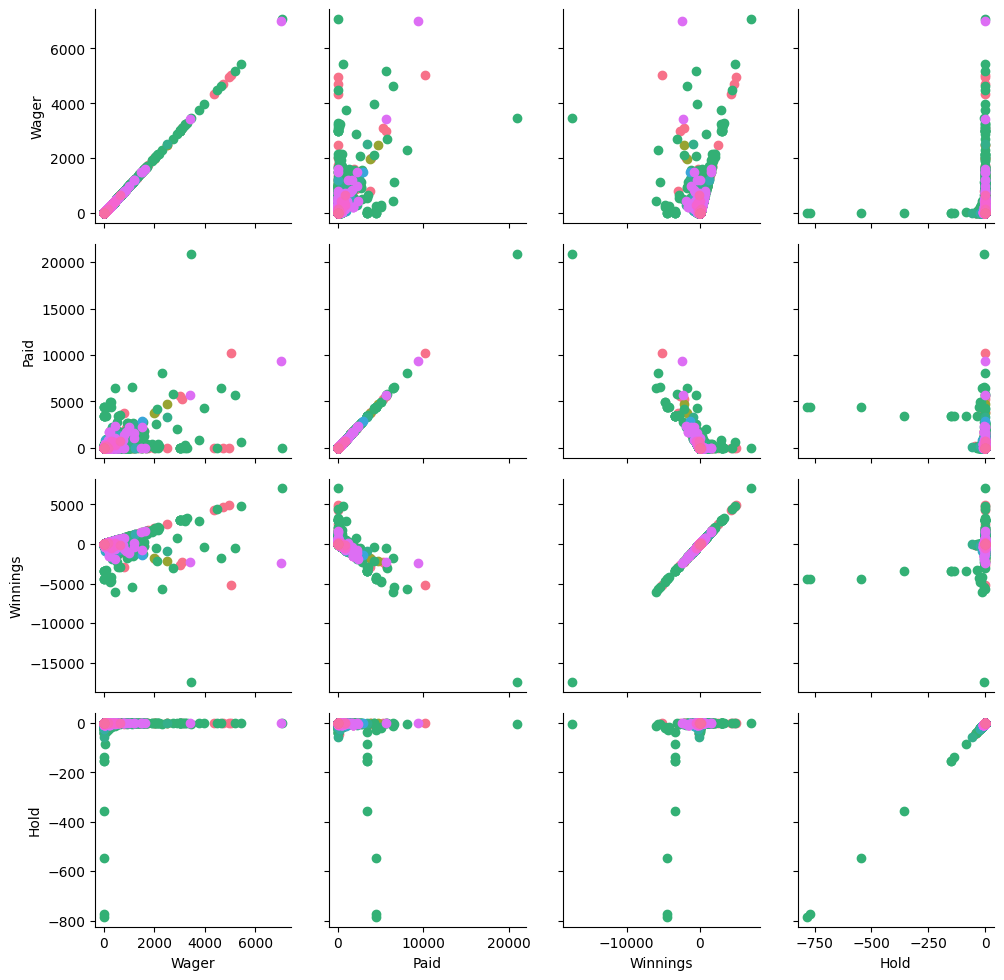

In [1226]:
g=sns.PairGrid(sportsbetting, hue="Sport")
g.map(plt.scatter)

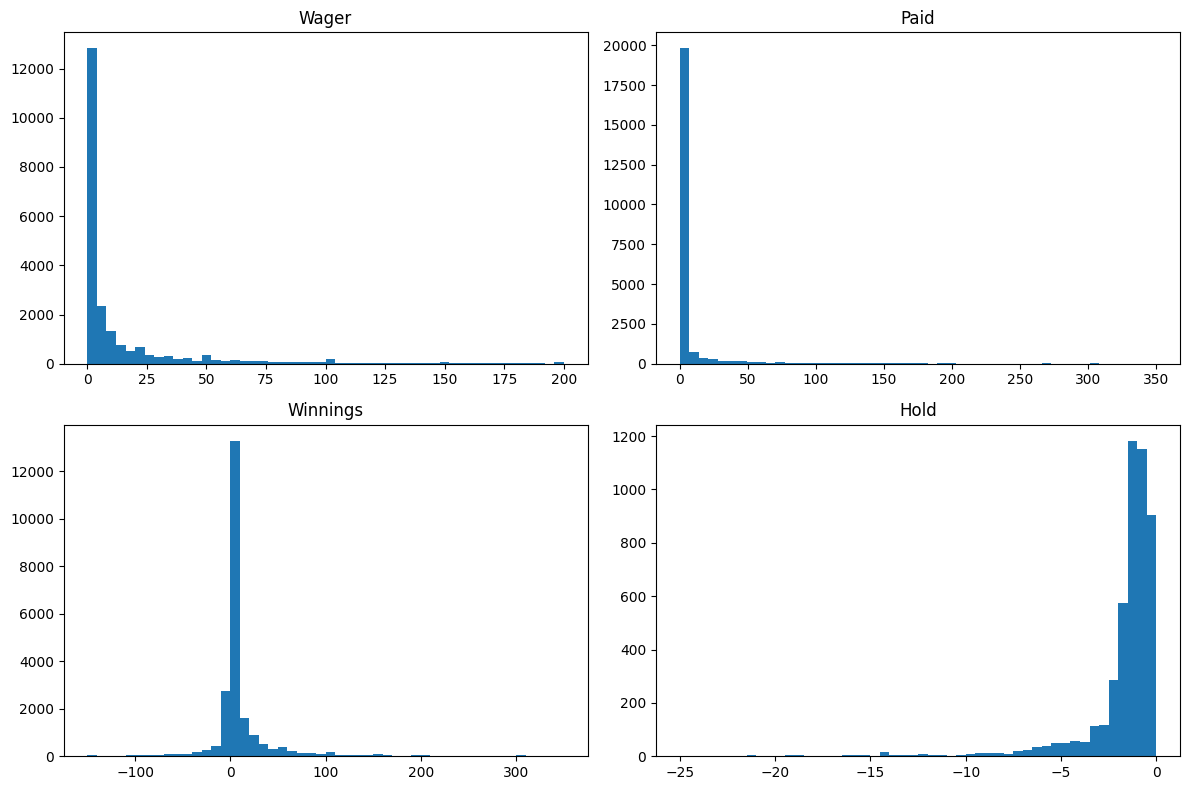

In [1227]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# "Wager" histogram
axs[0, 0].hist(sportsbetting["Wager"], bins=50,range=[0,200])
axs[0, 0].set_title("Wager")

# "Paid" histogram
axs[0, 1].hist(sportsbetting["Paid"], bins=50,range=[0,350])
axs[0, 1].set_title("Paid")

# "Winnings" histogram
axs[1, 0].hist(sportsbetting["Winnings"], bins=50, range=[-150,350])
axs[1, 0].set_title("Winnings")

# "Hold" histogram
axs[1, 1].hist(sportsbetting["Hold"], bins=50,range=[-25,0])
axs[1, 1].set_title("Hold")

plt.tight_layout()                          #Automatic adjusting design to avoid overlaps between the different grahps's elements 
plt.show()

### Numeric variables: Normality Test

Notes: 

- At first glance we can rule out that the "Wager", "Paid" and "Hold" columns follow a normal distribution. 
- The "Winnings" column is the only one likely to follow a normal distribution.
- A normality test is then carried out to confirm what is seen in the graphs. 
- Finally, none of the numerical variables follow a normal distribution.

In [1228]:
from scipy.stats import shapiro                                        


stat, p = shapiro(sportsbetting["Wager"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("We cannot reject that it follows a Gaussian distribution")
else:
	print("It does not follow a Gaussian distribution")

stat=0.196, p=0.000
It does not follow a Gaussian distribution


C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\278504706.py:4: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23607.



In [1229]:
stat, p = shapiro(sportsbetting["Paid"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("We cannot reject that it follows a Gaussian distribution")
else:
	print("It does not follow a Gaussian distribution")

stat=0.099, p=0.000
It does not follow a Gaussian distribution


C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\1923140538.py:1: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23607.



In [1230]:
stat, p = shapiro(sportsbetting["Winnings"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("We cannot reject that it follows a Gaussian distribution")
else:
	print("It does not follow a Gaussian distribution")

stat=0.173, p=0.000
It does not follow a Gaussian distribution


C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\4226823057.py:1: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23607.



In [1231]:
stat, p = shapiro(sportsbetting["Hold"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("We cannot reject that it follows a Gaussian distribution")
else:
	print("It does not follow a Gaussian distribution")

stat=0.032, p=0.000
It does not follow a Gaussian distribution


C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\4000944887.py:1: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23607.



### Object variables: Graphs & Adaptations

In [1232]:
sportsbetting.head(1)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Baloncesto    1.0   0.0       1.0   1.0     Unchecked  Germany Bundesliga   

                        Event Event_Date Time  
0  Alba Berlín - BG Gottingen 2024-02-13  NaN

#### - "Sport"

In [1233]:
sportsbetting["Sport"].unique()

array(['Baloncesto', 'Balonmano', 'Bandy', 'Béisbol', 'Boxeo', 'Caballos',
       'Ciclismo', 'Cricket', 'Dardos', 'Deportes de Invierno',
       'Fórmula 1', 'Fútbol', 'Fútbol Americano', 'Fútbol Sala', 'Galgos',
       'Golf', 'Hockey Hielo', 'Loteria', 'MMA', 'Padel', 'Rugby Union',
       'Snooker', 'Squash', 'Tenis', 'Tenis de Mesa', 'Voleibol',
       'Voley Playa', 'Waterpolo'], dtype=object)

In [1234]:
translation = {                                                     # Create dictionary with initial values and final equivalents
    "Baloncesto": "Basketball",
    "Balonmano": "Handball",
    "Bandy": "Bandy",
    "Béisbol": "Baseball",
    "Boxeo": "Boxing",
    "Caballos": "Horse Racing",
    "Ciclismo": "Cycling",
    "Cricket": "Cricket",
    "Dardos": "Darts",
    "Deportes de Invierno": "Winter Sports",
    "Fórmula 1": "Formula 1",
    "Fútbol": "Football",
    "Fútbol Americano": "American Football",
    "Fútbol Sala": "Indoor Football",
    "Galgos": "Greyhound Racing",
    "Golf": "Golf",
    "Hockey Hielo": "Ice Hockey",
    "Loteria": "Lotto",
    "MMA": "MMA",
    "Padel": "Padel",
    "Rugby Union": "Rugby Union",
    "Snooker": "Snooker",
    "Squash": "Squash",
    "Tenis": "Tennis",
    "Tenis de Mesa": "Table Tennis",
    "Voleibol": "Volleyball",
    "Voley Playa": "Beach Volleyball",
    "Waterpolo": "Waterpolo",
    " ": ""   
}

In [1235]:
sportsbetting["Sport"] = sportsbetting["Sport"].map(translation)            # "map()" maps the old values of the "Sport" column and converts them to their new value using as reference the created dictionary 
sportsbetting["Sport"].unique()                                             # Check new unique values

array(['Basketball', 'Handball', 'Bandy', 'Baseball', 'Boxing',
       'Horse Racing', 'Cycling', 'Cricket', 'Darts', 'Winter Sports',
       'Formula 1', 'Football', 'American Football', 'Indoor Football',
       'Greyhound Racing', 'Golf', 'Ice Hockey', 'Lotto', 'MMA', 'Padel',
       'Rugby Union', 'Snooker', 'Squash', 'Tennis', 'Table Tennis',
       'Volleyball', 'Beach Volleyball', 'Waterpolo'], dtype=object)

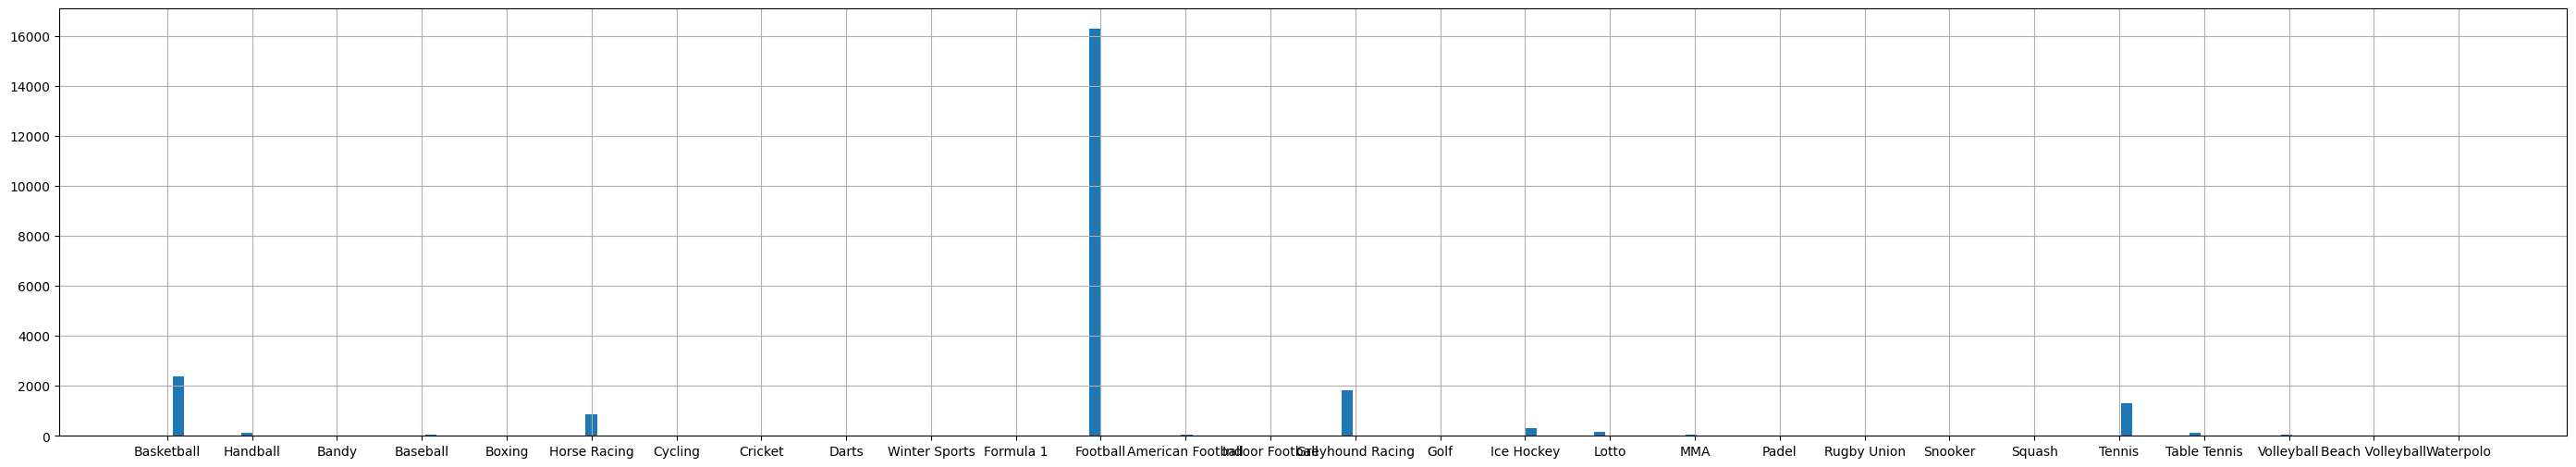

In [1236]:
sportsbetting["Sport"].hist(bins=100,rwidth=0.5)
plt.gcf().set_size_inches(35, 6)

In [1237]:
sportsbetting["Sport"].value_counts()                                                         # Check quantity of each unique value

Football             16273
Basketball            2375
Greyhound Racing      1825
Tennis                1313
Horse Racing           844
Ice Hockey             288
Lotto                  141
Handball               137
Table Tennis           111
American Football       61
Volleyball              51
Baseball                40
MMA                     31
Indoor Football         25
Cricket                 20
Darts                   15
Rugby Union             12
Beach Volleyball         9
Formula 1                7
Golf                     6
Waterpolo                6
Snooker                  5
Padel                    3
Winter Sports            3
Boxing                   2
Cycling                  2
Squash                   1
Bandy                    1
Name: Sport, dtype: int64

In [1238]:
((sportsbetting["Sport"].value_counts()/len(sportsbetting["Sport"]))*100).round(2)              # New check in percentages

Football             68.93
Basketball           10.06
Greyhound Racing      7.73
Tennis                5.56
Horse Racing          3.58
Ice Hockey            1.22
Lotto                 0.60
Handball              0.58
Table Tennis          0.47
American Football     0.26
Volleyball            0.22
Baseball              0.17
MMA                   0.13
Indoor Football       0.11
Cricket               0.08
Darts                 0.06
Rugby Union           0.05
Beach Volleyball      0.04
Formula 1             0.03
Golf                  0.03
Waterpolo             0.03
Snooker               0.02
Padel                 0.01
Winter Sports         0.01
Boxing                0.01
Cycling               0.01
Squash                0.00
Bandy                 0.00
Name: Sport, dtype: float64

Notes:

- The sport with the most bets, representing 69%, is Football.
- Football, Basketball, Greyhounds, Tennis and Horses have a sufficiently large number of entries to work with.
- The remaining categories together account for a total of 977 entries. They represent 4.1% of the data. Could be grouped into a single category in a new column.

#### - "Sport_Group", new column

In [1239]:
main_sports=["Football", "Basketball", "Greyhound Racing", "Tennis", "Horse Racing"]
sportsbetting["Sport_Group"] = "Other"
sportsbetting.loc[sportsbetting["Sport"].isin(main_sports), "Sport_Group"] = sportsbetting["Sport"]
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0     Unchecked  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0     Unchecked  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

In [1240]:
((sportsbetting["Sport_Group"].value_counts()/len(sportsbetting["Sport_Group"]))*100).round(2)   

Football            68.93
Basketball          10.06
Greyhound Racing     7.73
Tennis               5.56
Other                4.14
Horse Racing         3.58
Name: Sport_Group, dtype: float64

<Axes: >

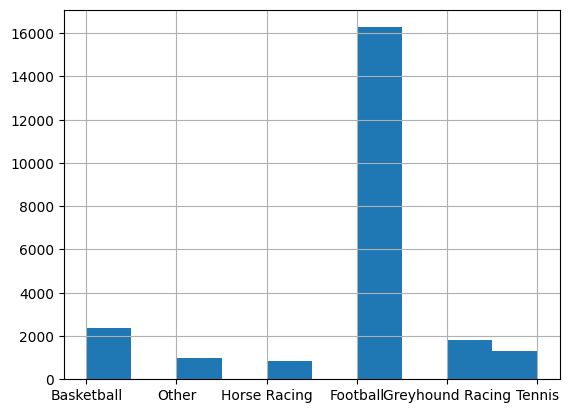

In [1241]:
sportsbetting["Sport_Group"].hist()

#### - "Purchase_Time"

In [1242]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0     Unchecked  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0     Unchecked  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

In [1243]:
sportsbetting["Purchase_Time"].value_counts()

Unchecked    15643
Checked       7964
Name: Purchase_Time, dtype: int64

In [1244]:
((sportsbetting["Purchase_Time"].value_counts()/len(sportsbetting["Purchase_Time"]))*100).round(2)

Unchecked    66.26
Checked      33.74
Name: Purchase_Time, dtype: float64

Notes:

- This column refers to the time at which the bet was purchased: before the match or during the match.
- "Unchecked" means "Prematch" and "Checked" means "Live".
- More than half of the bets were bought before the start of the game (unchecked).


In [1245]:
change = {
    "Unchecked": "Prematch",
    "Checked": "Live",
    " ": ""
}

sportsbetting["Purchase_Time"] = sportsbetting["Purchase_Time"].map(change)         # Apply "map()" to search and change values
sportsbetting["Purchase_Time"].unique()                                             # Check new unique values

array(['Prematch', 'Live'], dtype=object)

<Axes: >

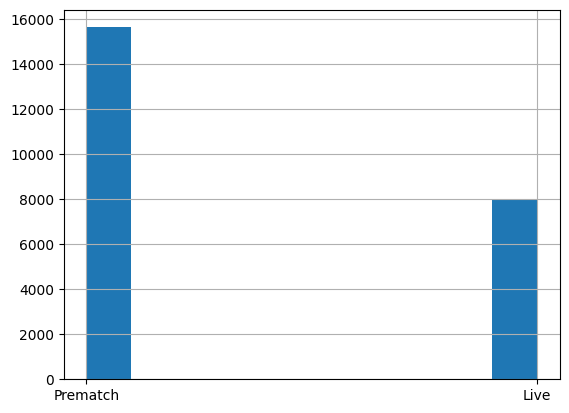

In [1246]:
sportsbetting["Purchase_Time"].hist()

#### - "Competition"

In [1247]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

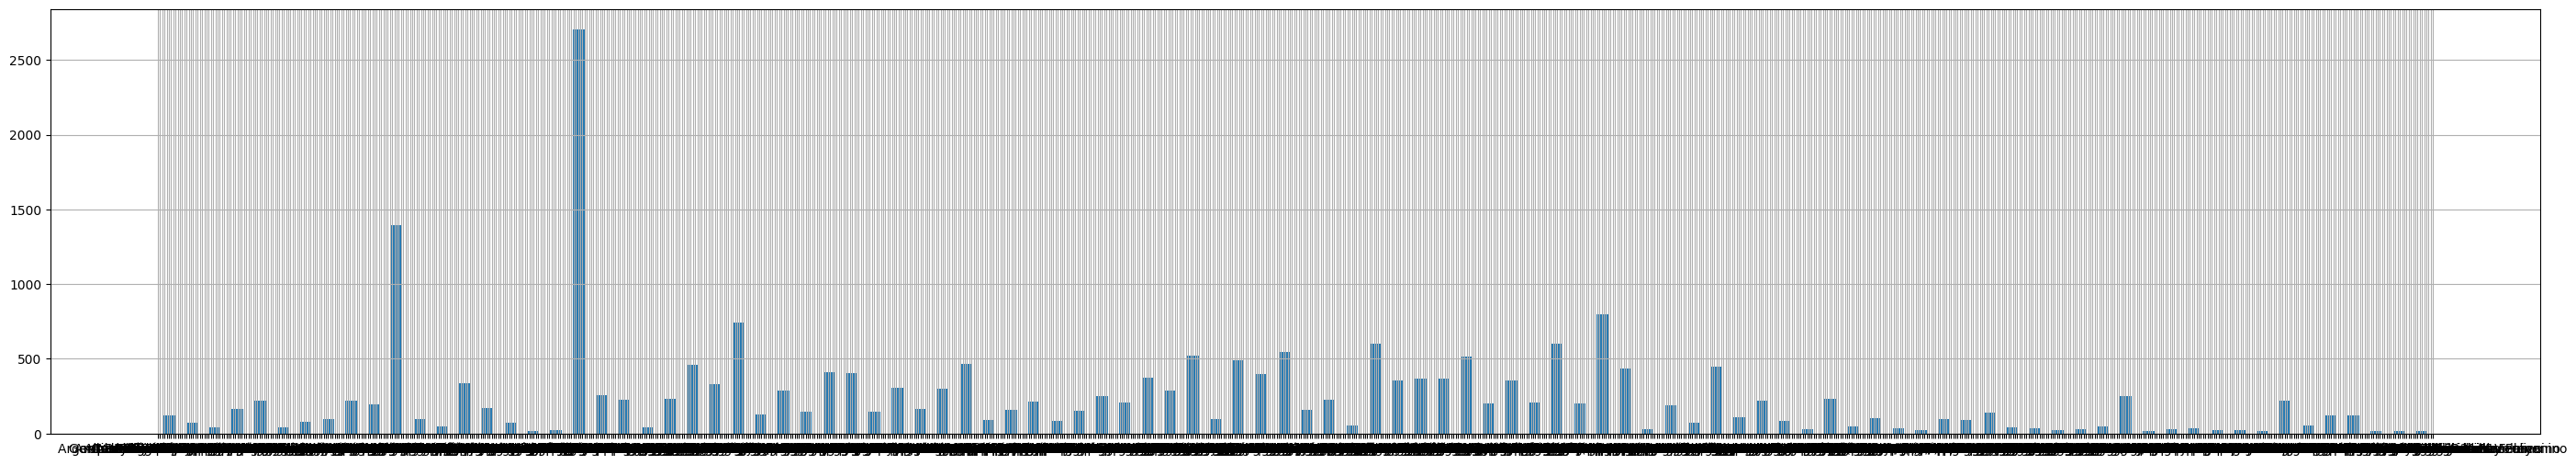

In [1248]:
sportsbetting["Competition"].hist(bins=100,rwidth=0.5)
plt.gcf().set_size_inches(35, 6)

In [1249]:
sportsbetting["Competition"].value_counts()

Carreras del Día                 2669
NBA                               950
Amistosos Clubes                  392
NCAA                              390
LaLiga                            289
                                 ... 
Copa del Rey de Baréin              1
Gimme 5 5/39                        1
Arabia Saudí Liga Premier           1
Fantasy 5 Arizona 5/41              1
Germany Bundesliga 2 Femenina       1
Name: Competition, Length: 1030, dtype: int64

In [1250]:
sportsbetting["Competition"].value_counts().unique()

array([2669,  950,  392,  390,  289,  266,  241,  240,  233,  229,  212,
        211,  198,  192,  189,  180,  179,  178,  176,  174,  173,  172,
        169,  163,  162,  159,  155,  151,  147,  145,  143,  136,  134,
        131,  130,  128,  127,  126,  124,  122,  121,  120,  117,  114,
        112,  106,  104,  103,  101,   98,   97,   96,   95,   93,   92,
         90,   86,   85,   80,   79,   77,   76,   75,   72,   71,   70,
         69,   66,   65,   64,   63,   62,   61,   60,   59,   57,   56,
         55,   53,   52,   51,   50,   49,   48,   47,   46,   45,   44,
         43,   42,   41,   40,   39,   38,   36,   35,   34,   33,   32,
         31,   30,   29,   28,   27,   26,   25,   24,   23,   22,   21,
         20,   19,   18,   17,   16,   15,   14,   13,   12,   11,   10,
          9,    8,    7,    6,    5,    4,    3,    2,    1], dtype=int64)

In [1251]:
sportsbetting["Competition"].unique()

array(['Germany Bundesliga', 'Germany Bundesliga 2 Pro A',
       'Alemania Copa', ..., 'Pro Tour Doha Femenino',
       'Campeonato del Mundo Femenino', 'Campeonato del Mundo Masculino'],
      dtype=object)

Note:

- The DataFrame presents a very high number of different competitions (1030). 
- The columns "Sport" and "Sport_Group" provide simpler and easier to process and understand data. 

#### - "Event"

In [1252]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

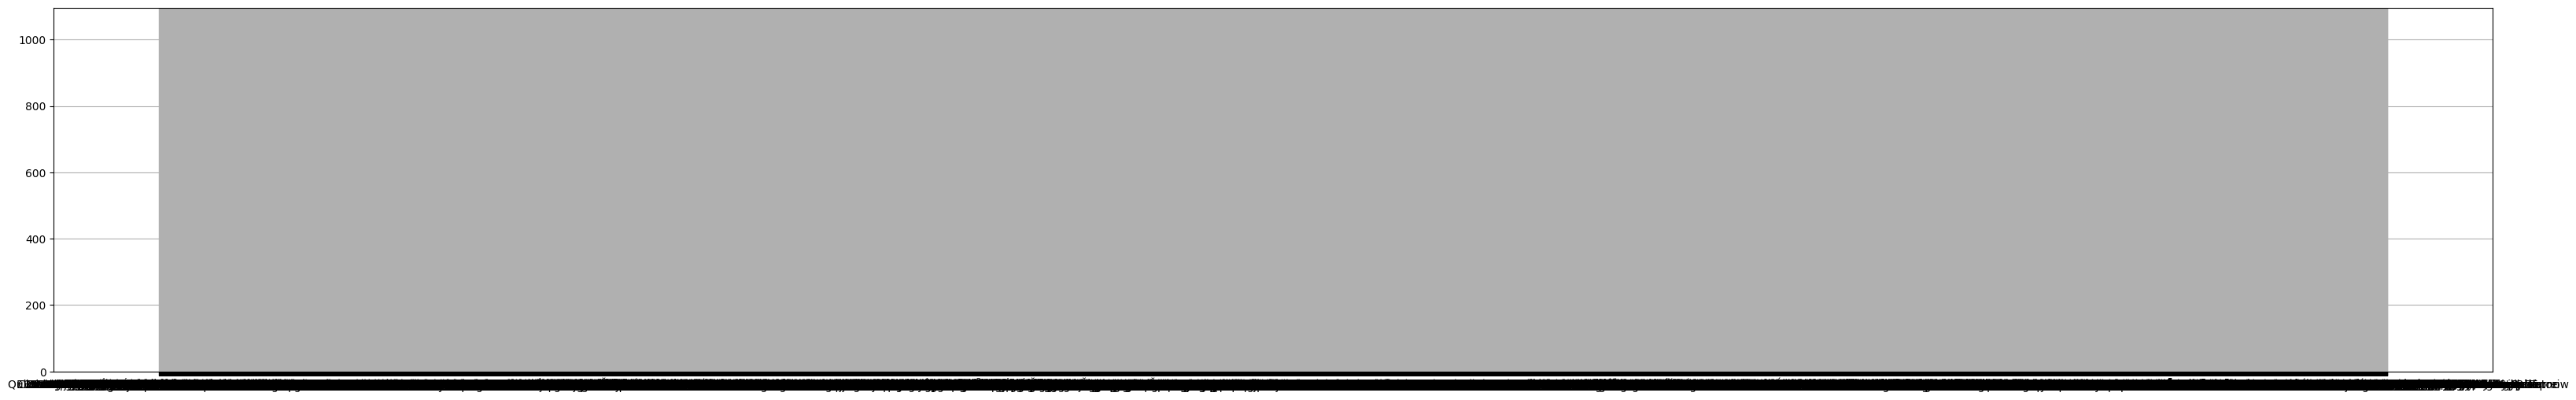

In [1253]:
sportsbetting["Event"].hist(bins=100,rwidth=0.5)
plt.gcf().set_size_inches(40, 6)

Note:

- "Event" column contains 19.067 different entries. A graph is not useful in this case.

#### - "Event Date"

In [1254]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Time Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  NaN  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  NaN  Basketball

<Axes: >

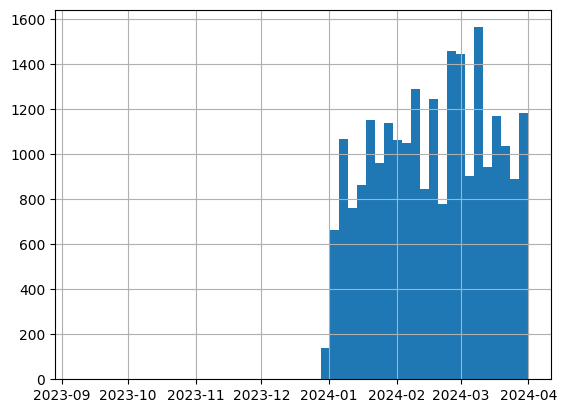

In [1255]:
sportsbetting["Event_Date"].hist(bins=50)

Note:

- The DataFrame contains information for 90 days, specifically from the first quarter of 2024.

#### - "Time"

In [1256]:
sportsbetting["Time"].value_counts()

16:00:00    1391
18:00:00    1278
19:00:00    1230
20:45:00    1018
20:00:00     973
            ... 
16:47:00       1
03:21:00       1
01:57:00       1
01:43:00       1
08:20:00       1
Name: Time, Length: 456, dtype: int64

Note:

- Most of the games take place between 16:00 and 21:00.

## Null Values & Treatment

In [1257]:
sportsbetting.isnull().sum().sum()                                

1310

In [1258]:
(sportsbetting.isnull().sum()/len(sportsbetting)*100).round(2)       

Sport            0.00
Wager            0.00
Paid             0.00
Winnings         0.00
Hold             0.00
Purchase_Time    0.00
Competition      0.00
Event            0.00
Event_Date       0.00
Time             5.55
Sport_Group      0.00
dtype: float64

In [1259]:
sportsbetting.isnull().sum()

Sport               0
Wager               0
Paid                0
Winnings            0
Hold                0
Purchase_Time       0
Competition         0
Event               0
Event_Date          0
Time             1310
Sport_Group         0
dtype: int64

In [1260]:
px.imshow(sportsbetting.isnull(), title="Heatmap of null values in sportsbetting", template="plotly_dark")       

Notes:

- Only the column "Time" has null values. 
- This is missing information which, in this case, represents 5.5% of the data in the column. 
- This column will not be used in the analysis and is therefore removed. 

In [1261]:
sportsbetting=sportsbetting.drop(columns=["Time"])          # Although the percentage of null values in this column is not high, 
                                                            # this column does not provide information that will be used later in this analysis 
                                                            # and for this reason it is deleted

In [1262]:
sportsbetting.head(2)                                       # Check of implemented changes

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  Basketball

## Correlation

### Numerical variables ("Wager", "Paid", "Winnings", "Hold")

Notes:

- As the variables do not follow a Gaussian distribution, Spearman or Kendall will provide better data than Pearson.
- There is a moderate positive correlation between "Winnings" and "Hold" (0.52) and between "Wager" and Winnings" (0.5). The relationship between Hold and Winnings, or Wager and Winnings, is weak.
- The strongest correlation is the negative (inverse) correlation between "Paid" and "Hold" (-0.97). The more you pay, the less the company earns.

In [1263]:
numeric_variables=sportsbetting.select_dtypes(include=['float64', 'int64']).columns

In [1264]:
correlation_matrix = sportsbetting[numeric_variables].corr(method="spearman")                
correlation_matrix

Wager      Paid  Winnings      Hold
Wager     1.000000  0.367112  0.497449 -0.244922
Paid      0.367112  1.000000 -0.449077 -0.966260
Winnings  0.497449 -0.449077  1.000000  0.523051
Hold     -0.244922 -0.966260  0.523051  1.000000

#### Heat Map (Comparision between Spearman, Kendall & Pearson)

In [1266]:
px.imshow(sportsbetting.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\826331543.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [1153]:
px.imshow(sportsbetting.corr("kendall").round(2), text_auto=True, title="Kendall Correlation between numerical variables",      
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\2739344709.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [1154]:
px.imshow(sportsbetting.corr("pearson").round(2), text_auto=True, title="Pearson Correlation between numerical variables",      
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\3113521090.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#### Test between numeric columns

In [1155]:
from scipy.stats import spearmanr

stat, p_value = spearmanr(sportsbetting["Paid"], sportsbetting["Winnings"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=-0.449, p=0.000
Probably dependent


In [1156]:
stat, p_value = spearmanr(sportsbetting["Paid"], sportsbetting["Wager"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=0.367, p=0.000
Probably dependent


In [1157]:
stat, p_value = spearmanr(sportsbetting["Paid"], sportsbetting["Hold"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=-0.966, p=0.000
Probably dependent


In [1158]:
stat, p_value = spearmanr(sportsbetting["Hold"], sportsbetting["Wager"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=-0.245, p=0.000
Probably dependent


In [1159]:
stat, p_value = spearmanr(sportsbetting["Hold"], sportsbetting["Winnings"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=0.523, p=0.000
Probably dependent


In [1160]:
stat, p_value = spearmanr(sportsbetting["Winnings"], sportsbetting["Wager"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
    	print("Probably dependent")

stat=0.497, p=0.000
Probably dependent


Note:

- All are probably dependants.

### Object variables ("Sport", "Purchase_time", "Competition", "Event","Sport_Group")

In [1161]:
sportsbetting.head(2)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  Basketball

#### Label encode

In [1268]:
from sklearn.preprocessing import LabelEncoder

sportsbetting_encoded=sportsbetting.copy()
columns_to_encode = ["Sport", "Purchase_Time", "Competition", "Event", "Sport_Group"]
label_encoder = LabelEncoder()
for col in columns_to_encode:
    sportsbetting[col+"_encoded"] = label_encoder.fit_transform(sportsbetting[col])

sportsbetting_encoded.head(2)


Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball   1.00   0.0      1.00   1.0      Prematch  Germany Bundesliga   
1  Basketball  42.52   0.0     42.52   1.0      Prematch  Germany Bundesliga   

                                 Event Event_Date Sport_Group  
0           Alba Berlín - BG Gottingen 2024-02-13  Basketball  
1  Alba Berlín - EWE Baskets Oldenburg 2024-03-03  Basketball

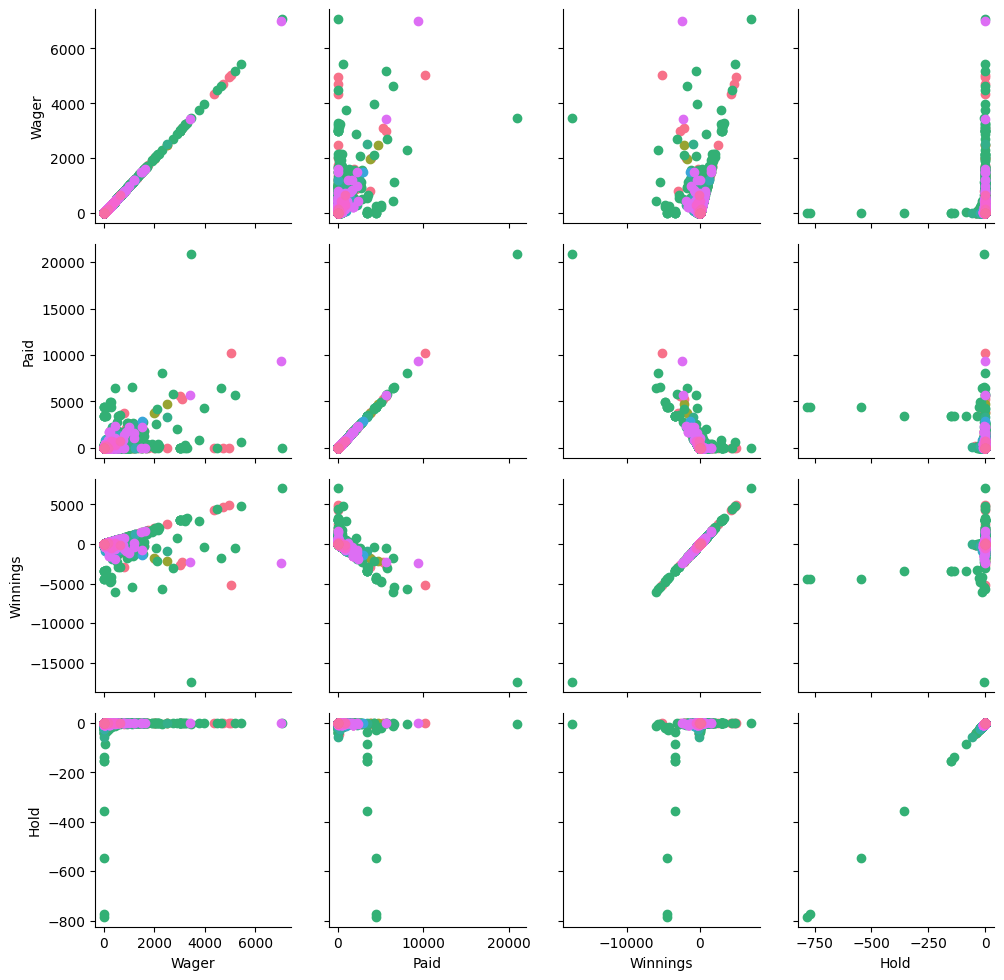

In [1163]:
g=sns.PairGrid(sportsbetting_encoded, hue="Sport")
g.map(plt.scatter)

In [1164]:
px.imshow(sportsbetting_encoded.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=800)

C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\3474178293.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Notes:

- There is a strong correlation between "Sport" and "Sport_Group"
- There is no moderate or strong correlation between any of the original numerical variables and the coded variables.

In [1168]:
# stat, p_value = spearmanr(sportsbetting_encoded["Wager"], sportsbetting_encoded["Event_encoded"])
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print("Probably independent")
# else:
#     	print("Probably dependent")

## Outliers Query

In [1169]:
sportsbetting.head(1)

Sport  Wager  Paid  Winnings  Hold Purchase_Time         Competition  \
0  Basketball    1.0   0.0       1.0   1.0      Prematch  Germany Bundesliga   

                        Event Event_Date Sport_Group  Sport_encoded  \
0  Alba Berlín - BG Gottingen 2024-02-13  Basketball              3   

   Purchase_Time_encoded  Competition_encoded  Event_encoded  \
0                      1                  504           1186   

   Sport_Group_encoded  
0                    0

In [1170]:
sportsbetting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23607 entries, 0 to 23606
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sport                  23607 non-null  object        
 1   Wager                  23607 non-null  float64       
 2   Paid                   23607 non-null  float64       
 3   Winnings               23607 non-null  float64       
 4   Hold                   23607 non-null  float64       
 5   Purchase_Time          23607 non-null  object        
 6   Competition            23607 non-null  object        
 7   Event                  23607 non-null  object        
 8   Event_Date             23607 non-null  datetime64[ns]
 9   Sport_Group            23607 non-null  object        
 10  Sport_encoded          23607 non-null  int32         
 11  Purchase_Time_encoded  23607 non-null  int32         
 12  Competition_encoded    23607 non-null  int32         
 13  E

In [1171]:
numeric_columns=sportsbetting_encoded.select_dtypes(include=["float64", "int64"])
numeric_columns.head(2)

Wager  Paid  Winnings  Hold
0   1.00   0.0      1.00   1.0
1  42.52   0.0     42.52   1.0

In [1172]:
percentiles=np.percentile(numeric_columns, [25, 75],axis=0) 
print(percentiles)

[[ 0.6         0.          0.07        0.68892051]
 [18.745       0.85        8.33        1.        ]]


In [1173]:
outliers=numeric_columns.copy()
for col in outliers.columns:
    Q1 = outliers[col].quantile(0.25)                #Calculation of the 25th percentile
    Q3 = outliers[col].quantile(0.75)                #Calculation of the 75th percentile
    
    IQR = Q3 - Q1                                    #Calculation of interquartile range (IQR)
    
    lower_limit = Q1 - 1.5 * IQR                     #Calculation of interval limits
    upper_limit = Q3 + 1.5 * IQR

   
    outliers[col] = outliers[col].apply(lambda x: x>lower_limit and x<upper_limit)   #Substitution of numeric values by boolean values to identify which positions 
                                                                                     #are within the IQR (True) 
                                                                                     #and which are not and are Outliers (False)


In [1174]:
outliers                                            #Check columns with boolean values 

Wager  Paid  Winnings  Hold
0       True  True      True  True
1       True  True     False  True
2       True  True      True  True
3       True  True      True  True
4       True  True      True  True
...      ...   ...       ...   ...
23602   True  True      True  True
23603   True  True      True  True
23604   True  True      True  True
23605   True  True      True  True
23606   True  True      True  True

[23607 rows x 4 columns]

In [1175]:
outliers["Total"]=outliers[["Wager","Paid","Winnings","Hold"]].sum(axis=1)          #Sum of "True" of each line in a new column

In [1176]:
outliers["Total"] = len(["Wager", "Paid", "Winnings", "Hold"]) - outliers[["Wager", "Paid", "Winnings", "Hold"]].sum(axis=1)   #Sum of False (Outliers)

In [1177]:
outliers.head()                                                                     #Check new column

Wager  Paid  Winnings  Hold  Total
0   True  True      True  True      0
1   True  True     False  True      1
2   True  True      True  True      0
3   True  True      True  True      0
4   True  True      True  True      0

In [1178]:
outliers["Total"].sum()  

19543

In [1179]:
(((outliers["Total"].sum())/len(outliers))*100).round(2)

82.78

In [1180]:
outliers["Total"].value_counts()                                                  #Check number of outliers in each line using column "Total"

0    14483
2     3704
1     2618
3     1691
4     1111
Name: Total, dtype: int64

In [1181]:
((outliers["Total"].value_counts()/len(outliers))*100).round(2)                   #Same in percentage

0    61.35
2    15.69
1    11.09
3     7.16
4     4.71
Name: Total, dtype: float64

In [1182]:
sportsbetting[outliers["Total"]>2].value_counts().sum()                         

2802

In [1183]:
(((sportsbetting[outliers["Total"]>2].value_counts().sum())/len(outliers))*100).round(2)        

11.87

Notes:

- This is a real data set where bets are sometimes infrequent and do not represent the usual betting value. 
- The number of lines with outliers is very high: 19,543, a 82.78%.
- Removing some of the lines containing outliers may improve future prediction.
- The total number of lines in which all 4 numerical elements are Outliers is 1,111. These lines represent 4.71%.
- The dataset has 23,607 lines, removing 1,111 would leave 22,496 lines and less than 5% of the dataset would be lost. This would be acceptable. 

In [1184]:
sportsbetting["Sport"].value_counts()

Football             16273
Basketball            2375
Greyhound Racing      1825
Tennis                1313
Horse Racing           844
Ice Hockey             288
Lotto                  141
Handball               137
Table Tennis           111
American Football       61
Volleyball              51
Baseball                40
MMA                     31
Indoor Football         25
Cricket                 20
Darts                   15
Rugby Union             12
Beach Volleyball         9
Formula 1                7
Golf                     6
Waterpolo                6
Snooker                  5
Padel                    3
Winter Sports            3
Boxing                   2
Cycling                  2
Squash                   1
Bandy                    1
Name: Sport, dtype: int64

In [1185]:
sportsbetting["Sport"][outliers["Total"]==4].value_counts()

Football             641
Basketball           228
Tennis               112
Horse Racing          30
Greyhound Racing      28
American Football     14
Handball              14
Cricket               13
Volleyball             8
Ice Hockey             6
Table Tennis           5
Lotto                  3
Rugby Union            3
MMA                    2
Beach Volleyball       2
Formula 1              1
Boxing                 1
Name: Sport, dtype: int64

In [1186]:
(((sportsbetting["Sport"][outliers["Total"]==4].value_counts())/len(sportsbetting["Sport"]))*100).round(2)

Football             2.72
Basketball           0.97
Tennis               0.47
Horse Racing         0.13
Greyhound Racing     0.12
American Football    0.06
Handball             0.06
Cricket              0.06
Volleyball           0.03
Ice Hockey           0.03
Table Tennis         0.02
Lotto                0.01
Rugby Union          0.01
MMA                  0.01
Beach Volleyball     0.01
Formula 1            0.00
Boxing               0.00
Name: Sport, dtype: float64

Note:

- Sports with more lines will be more affected by a Outliers removal.
- Some minoritary sports will not be affected at all. 

In [1187]:
(outliers.sum()/len(outliers)).round(2)

Wager       0.84
Paid        0.78
Winnings    0.76
Hold        0.78
Total       0.83
dtype: float64

## New CSV

- Before applying any other change, will keep a new csv with all changes till now. 
- After applying normalization to the data and removing outliers, a new version of the DataFrame will be created.
- Both csv will be used to make the same prediction in ML Azure and compare the results using one and the other.

In [1188]:
mysportsbetting=sportsbetting.to_csv("mysportsbetting.csv",index=False)
mysportsbetting=sportsbetting.to_excel("mysportsbetting.xlsx", index=False) 

## Normalisation

Notes:
    
- The distribution of the data dont' follow a Gaussian distribution so it is not recommended to apply "Standart".
- In addition to not having a normal distribution, there is a high number of outliers so it is not recommended to apply a "MinMax" normalisation either.
- Other option could be Box-Cox, that will adjust the data to a normal distribution.
- I this case, the robustness of the data is more important than its fit to a normal distribution.
- Taking into account these parameters (non-normal distribution, high number of Outliers and the objective), RobustScaler is the most suitable normalisation method for this dataset.
- RobustScaler will use median and IRQ to scale data.

#### RobustScaler

In [1189]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()                                                                     #Create an instance                       
numerical_columns = sportsbetting_encoded.select_dtypes(include=["float64", "int64"])       #Select numerical columns
sportsbetting_scaled=sportsbetting.copy()
sportsbetting_scaled[numerical_columns.columns] = scaler.fit_transform(numerical_columns)   #Normalise data
sportsbetting_scaled.head(2)

Sport     Wager  Paid  Winnings  Hold Purchase_Time  \
0  Basketball -0.101956   0.0 -0.012107   0.0      Prematch   
1  Basketball  2.186277   0.0  5.014528   0.0      Prematch   

          Competition                                Event Event_Date  \
0  Germany Bundesliga           Alba Berlín - BG Gottingen 2024-02-13   
1  Germany Bundesliga  Alba Berlín - EWE Baskets Oldenburg 2024-03-03   

  Sport_Group  Sport_encoded  Purchase_Time_encoded  Competition_encoded  \
0  Basketball              3                      1                  504   
1  Basketball              3                      1                  504   

   Event_encoded  Sport_Group_encoded  
0           1186                    0  
1           1188                    0

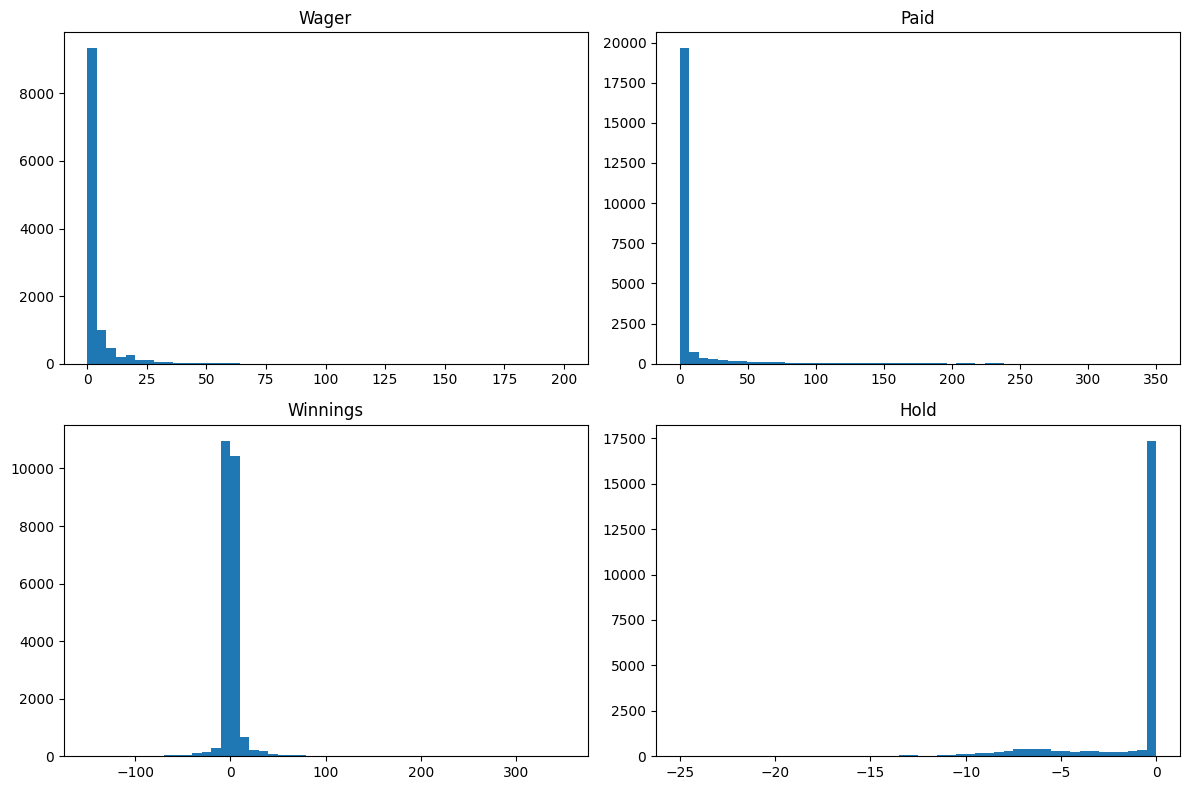

In [1190]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# "Wager" histogram
axs[0, 0].hist(sportsbetting_scaled["Wager"], bins=50,range=[0,200])
axs[0, 0].set_title("Wager")

# "Paid" histogram
axs[0, 1].hist(sportsbetting_scaled["Paid"], bins=50,range=[0,350])
axs[0, 1].set_title("Paid")

# "Winnings" histogram
axs[1, 0].hist(sportsbetting_scaled["Winnings"], bins=50, range=[-150,350])
axs[1, 0].set_title("Winnings")

# "Hold" histogram
axs[1, 1].hist(sportsbetting_scaled["Hold"], bins=50,range=[-25,0])
axs[1, 1].set_title("Hold")

plt.tight_layout()                          #Automatic adjusting design to avoid overlaps between the different grahps's elements 
plt.show()

#### Comparision, before and after appliying RobustScaler

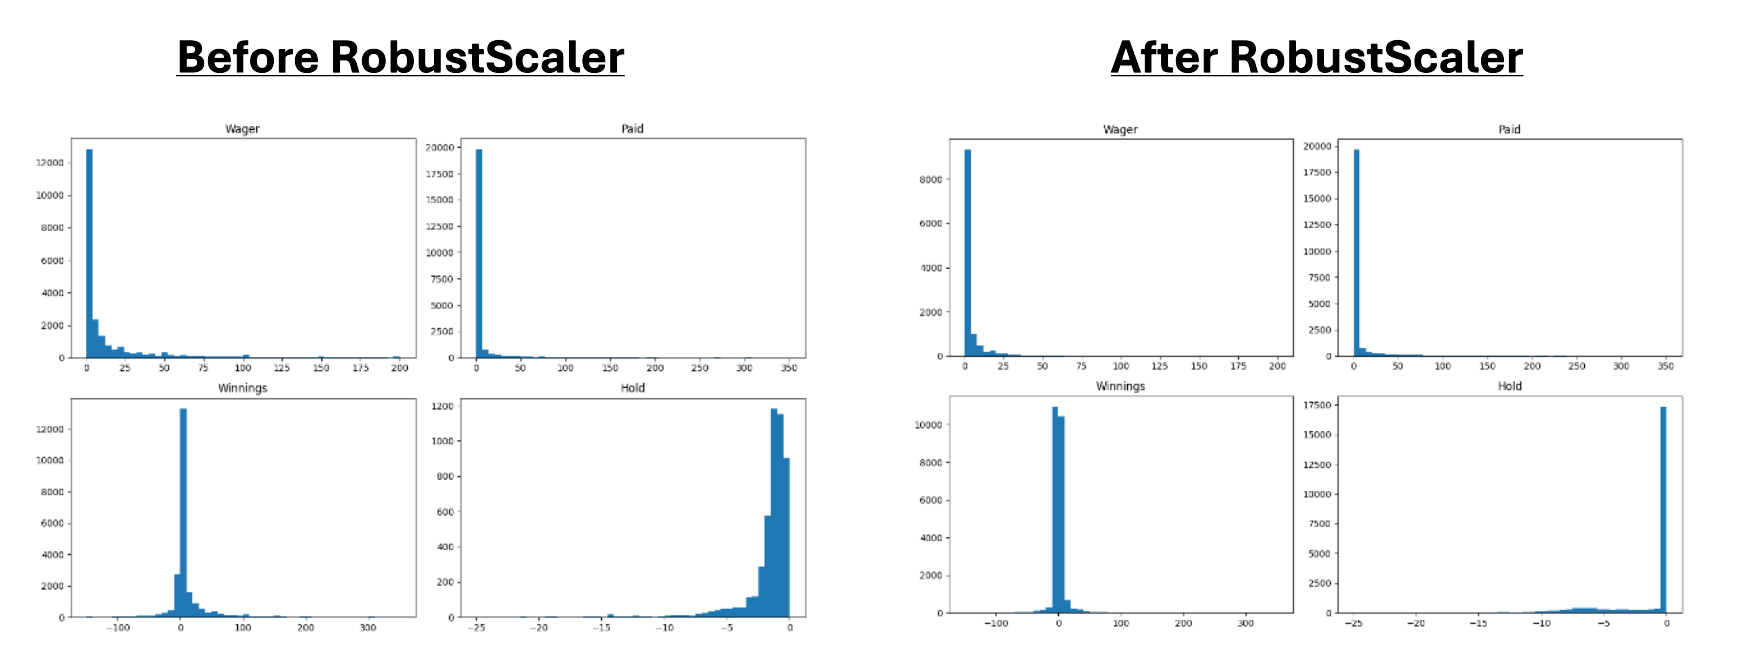

## Outliers removing

### Recheck

In [1200]:
outliers.head()   

Wager  Paid  Winnings  Hold  Total
0   True  True      True  True      0
1   True  True     False  True      1
2   True  True      True  True      0
3   True  True      True  True      0
4   True  True      True  True      0

In [1201]:
((outliers["Total"].value_counts()/len(outliers))*100).round(2)                   

0    61.35
2    15.69
1    11.09
3     7.16
4     4.71
Name: Total, dtype: float64

### Remove

In [1202]:
sportsbetting_filtered = sportsbetting_scaled[outliers["Total"] != 4]        #Get all lines except the ones where column "Total" in Outliers is 4 (the 4 numerical columns are Outliers)
                                                                             #Outliers removed represented 4,71% in the df


## New csv normalisated csv iwthout part of the Outliers

In [1205]:
filtered_df=sportsbetting_filtered.to_csv("mysportsbetting_filtered.csv",index=False)
filtered_df=sportsbetting_filtered.to_excel("mysportsbetting_filtered.xlsx", index=False) 

Gráficos

## Visualization of the last csv

In [1208]:
sportsbetting_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22496 entries, 0 to 23606
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sport                  22496 non-null  object        
 1   Wager                  22496 non-null  float64       
 2   Paid                   22496 non-null  float64       
 3   Winnings               22496 non-null  float64       
 4   Hold                   22496 non-null  float64       
 5   Purchase_Time          22496 non-null  object        
 6   Competition            22496 non-null  object        
 7   Event                  22496 non-null  object        
 8   Event_Date             22496 non-null  datetime64[ns]
 9   Sport_Group            22496 non-null  object        
 10  Sport_encoded          22496 non-null  int32         
 11  Purchase_Time_encoded  22496 non-null  int32         
 12  Competition_encoded    22496 non-null  int32         
 13  E

In [1209]:
sportsbetting_filtered.head(2)

Sport     Wager  Paid  Winnings  Hold Purchase_Time  \
0  Basketball -0.101956   0.0 -0.012107   0.0      Prematch   
1  Basketball  2.186277   0.0  5.014528   0.0      Prematch   

          Competition                                Event Event_Date  \
0  Germany Bundesliga           Alba Berlín - BG Gottingen 2024-02-13   
1  Germany Bundesliga  Alba Berlín - EWE Baskets Oldenburg 2024-03-03   

  Sport_Group  Sport_encoded  Purchase_Time_encoded  Competition_encoded  \
0  Basketball              3                      1                  504   
1  Basketball              3                      1                  504   

   Event_encoded  Sport_Group_encoded  
0           1186                    0  
1           1188                    0

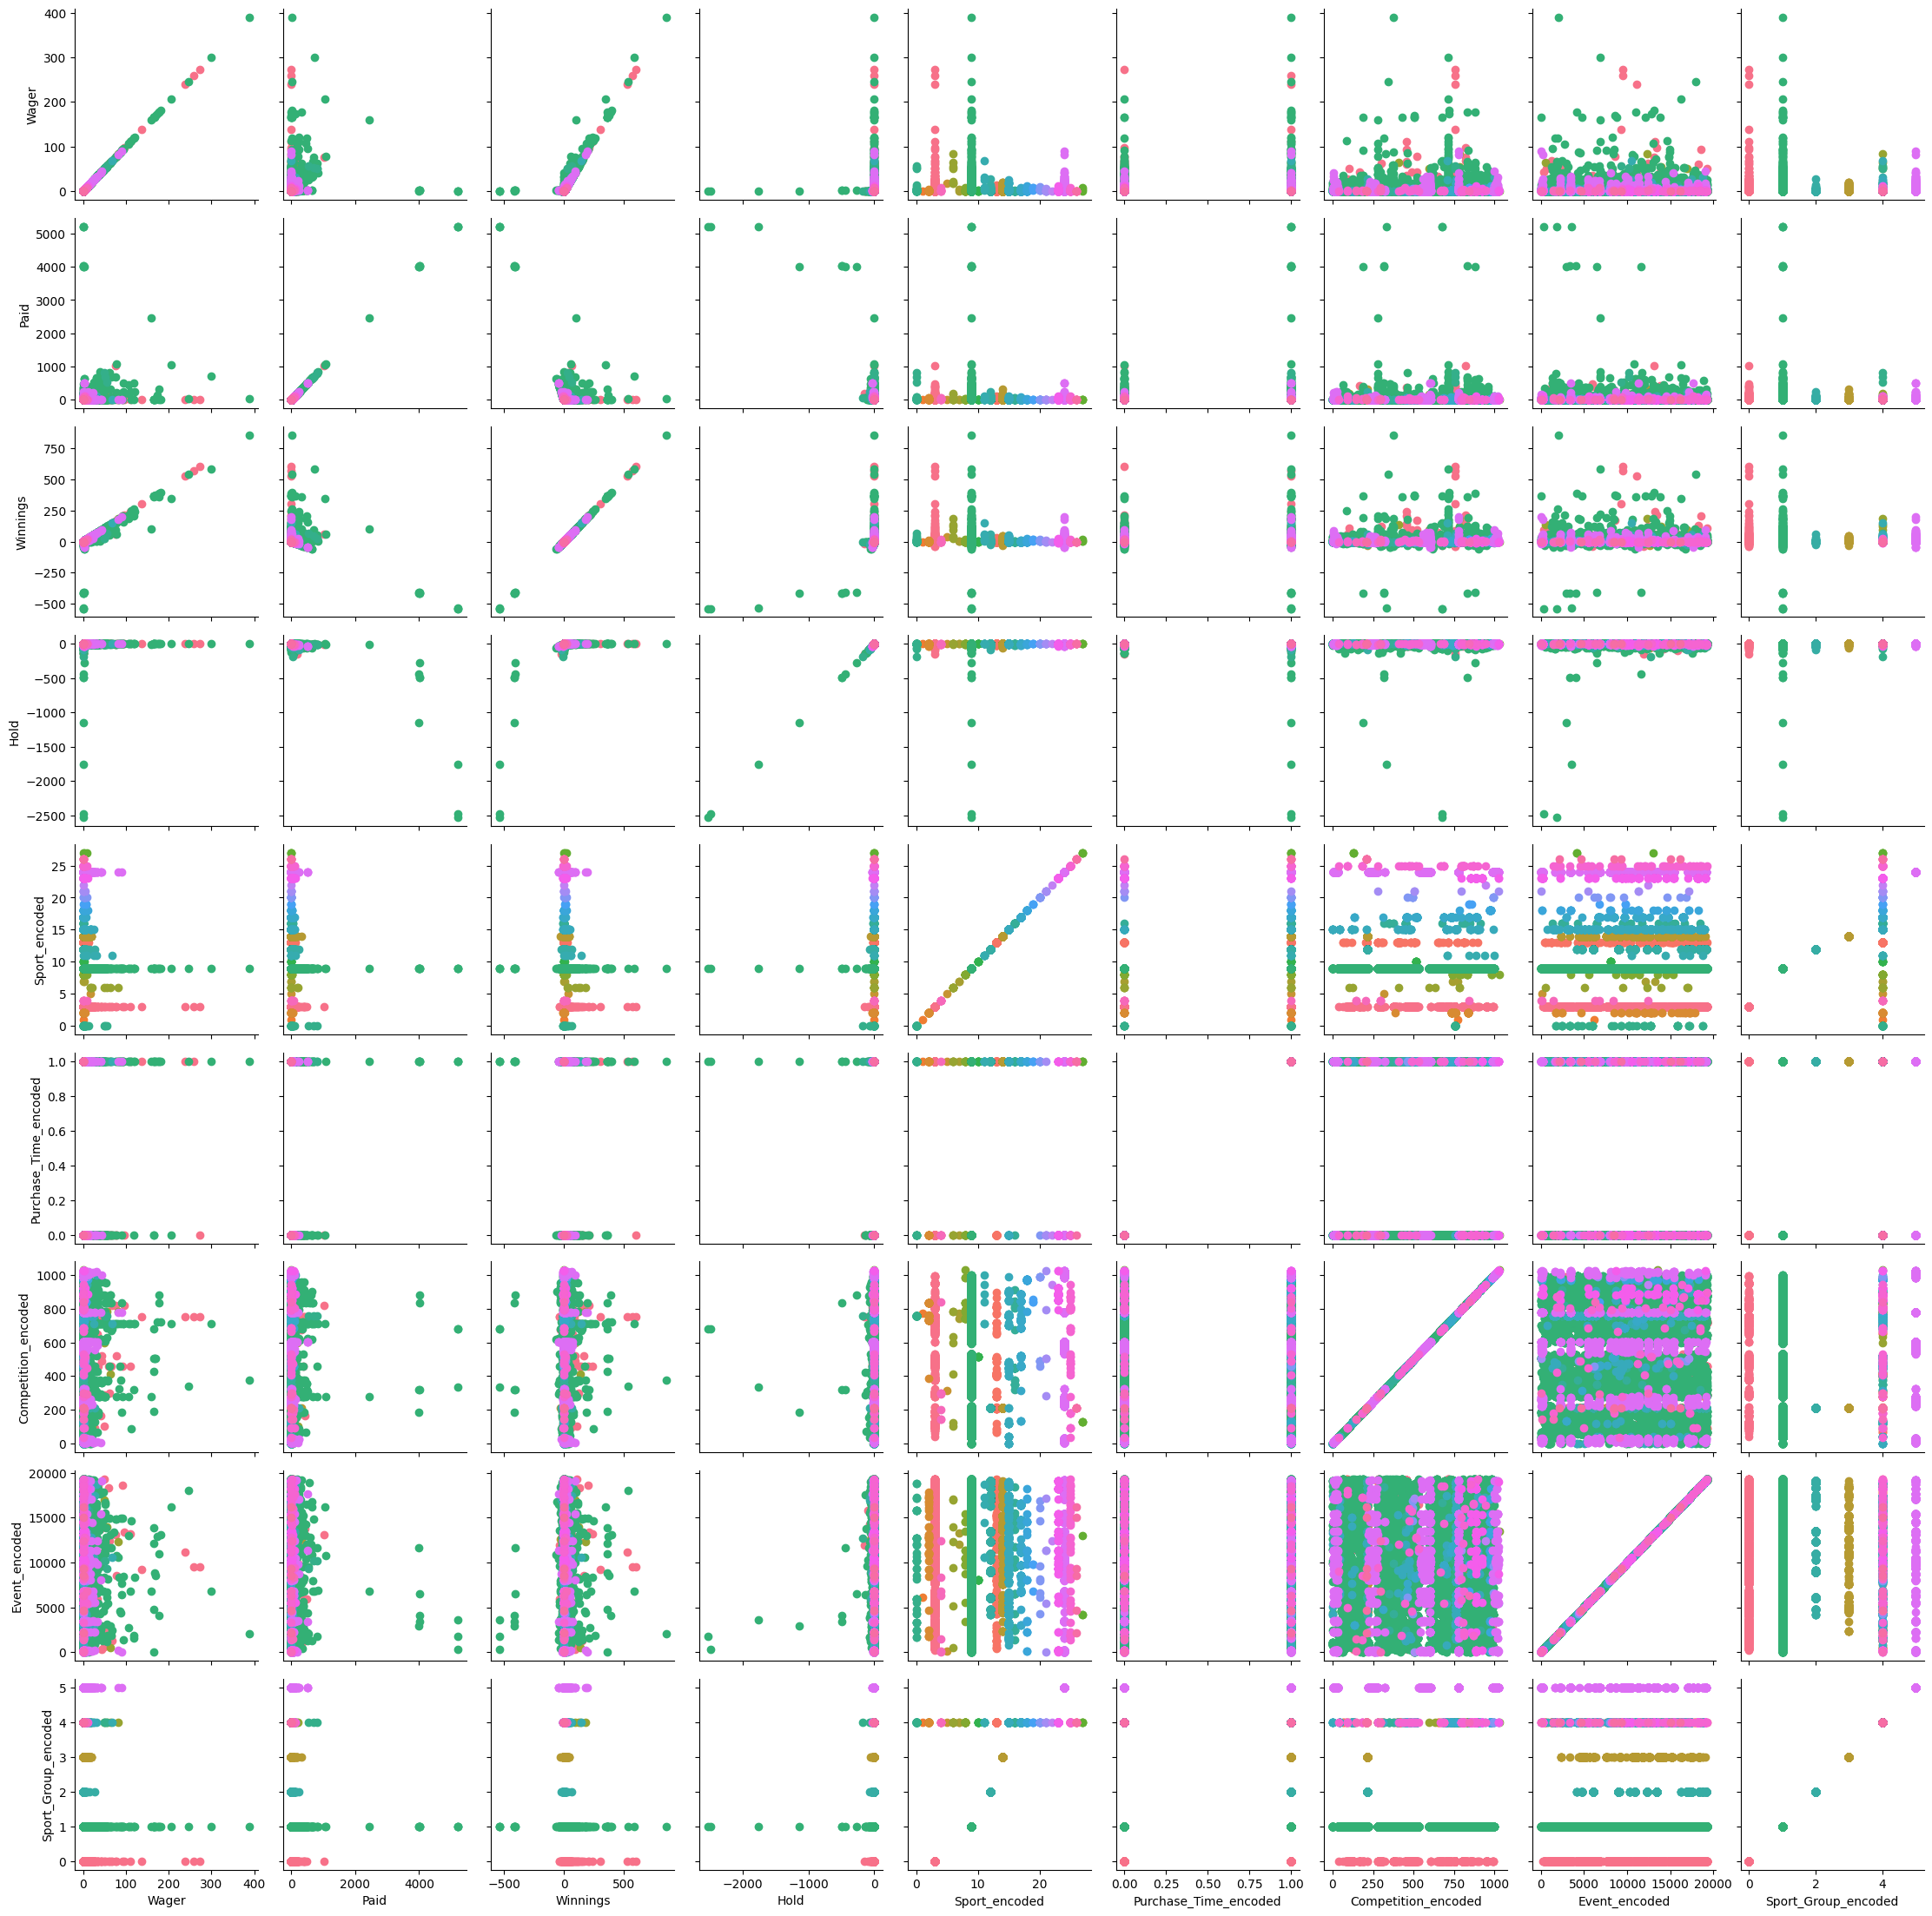

In [1210]:
g=sns.PairGrid(sportsbetting_filtered, hue="Sport")
g.map(plt.scatter)

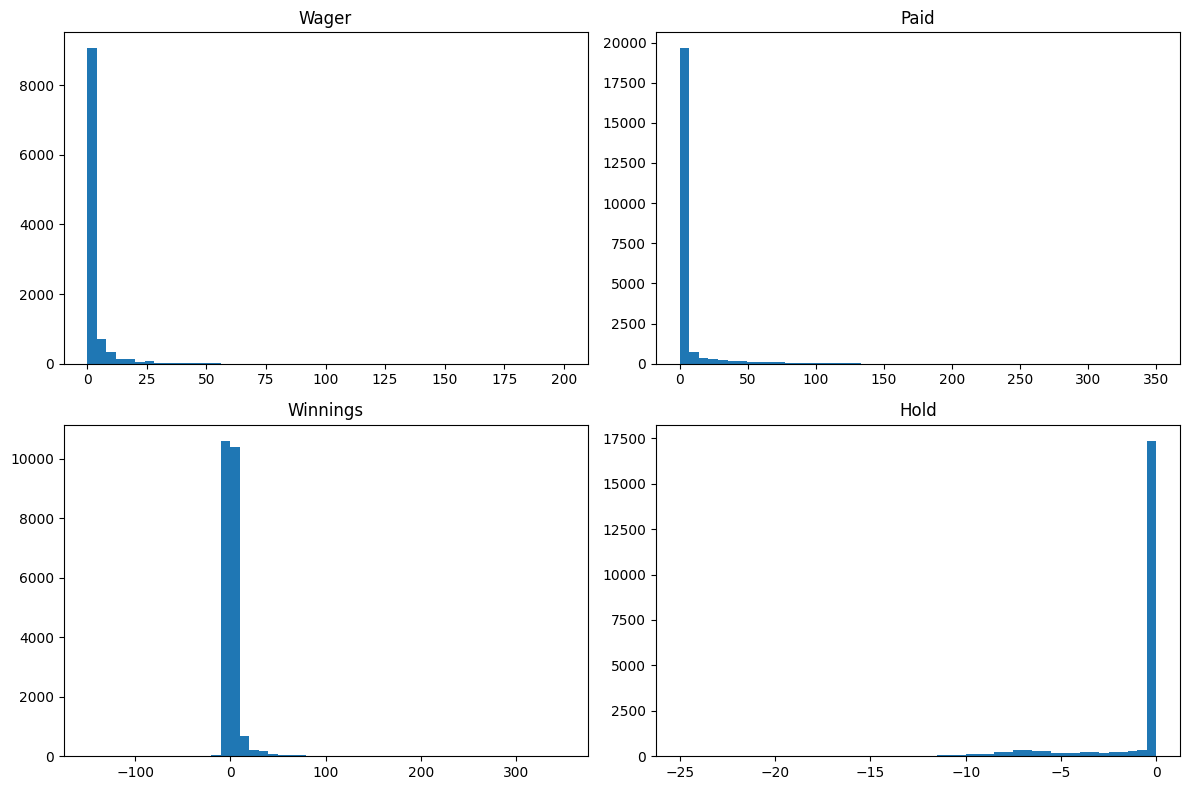

In [1211]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# "Wager" histogram
axs[0, 0].hist(sportsbetting_filtered["Wager"], bins=50,range=[0,200])
axs[0, 0].set_title("Wager")

# "Paid" histogram
axs[0, 1].hist(sportsbetting_filtered["Paid"], bins=50,range=[0,350])
axs[0, 1].set_title("Paid")

# "Winnings" histogram
axs[1, 0].hist(sportsbetting_filtered["Winnings"], bins=50, range=[-150,350])
axs[1, 0].set_title("Winnings")

# "Hold" histogram
axs[1, 1].hist(sportsbetting_filtered["Hold"], bins=50,range=[-25,0])
axs[1, 1].set_title("Hold")

plt.tight_layout()                          #Automatic adjusting design to avoid overlaps between the different grahps's elements 
plt.show()

In [1214]:
px.imshow(sportsbetting_filtered.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_5296\4226554965.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Correlation comparision between the two csv

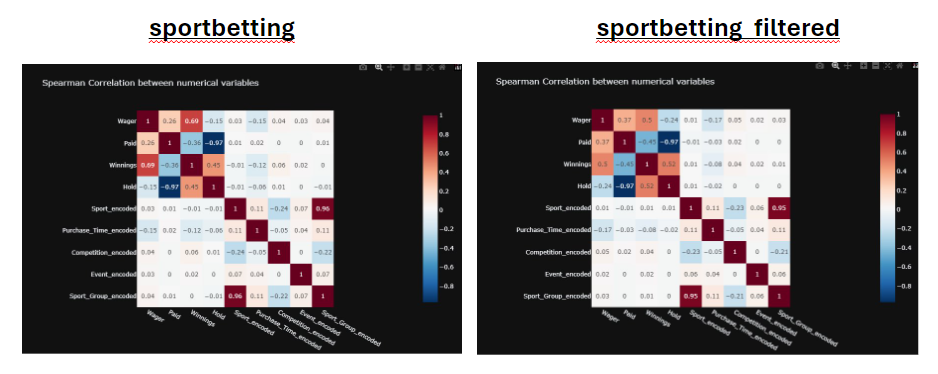